<a href="https://colab.research.google.com/github/hadis-raad/imf_datadive_climate/blob/main/predicting_structure_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
train_data= pd.read_csv('/content/groundtruth_osm_Fairfax_admin_buildings.csv')
train_df=pd.DataFrame(train_data)

Confusion matrix:
[[ 128   47]
 [  12 3520]]


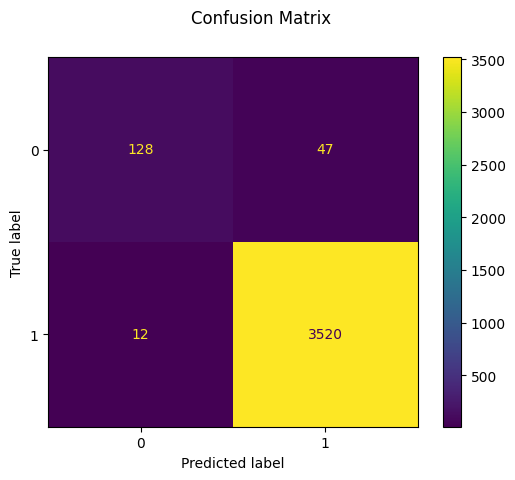

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...):
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       175
           1       0.99      1.00      0.99      3532

    accuracy                           0.98      3707

In [ ]:
nominal_features = list(train_df.columns[3:])

X = train_df[nominal_features]
y = train_df["official_type"]
weights = {0:2.0, 1:1.0}

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.2, shuffle=True)

# dt_split=DecisionTreeClassifier(class_weight=weights, min_samples_split=20, \
#                              random_state=0, min_impurity_decrease=0.0001)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=0,
)

# Learn on the train subset
xgb_classifier.fit(X_train, y_train)

# Predict the target on the test subset
predicted = xgb_classifier.predict(X_test)

# 1 = RES; 0 = NON_RES

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

print(
    f"Classification report for classifier {xgb_classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [ ]:
dt_split.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
Boulder_official_df= pd.read_csv("/content/grountruth_osm_Boulder_City_Buildings.csv")
Boulder_official_df = pd.DataFrame(Boulder_official_df)
Boulder_official_df = Boulder_official_df[["geometry", "official_type"]]

In [ ]:
Boulder_df= pd.read_csv("/content/processed_Boulder_City_Buildings_osm.csv")
Boulder_df = pd.DataFrame(Boulder_df)

In [ ]:
# add the official type to osm data for providing test score
result_df = Boulder_official_df.merge(Boulder_df, on='geometry', how='inner')

Confusion matrix:
[[ 1382  1002]
 [  163 20528]]


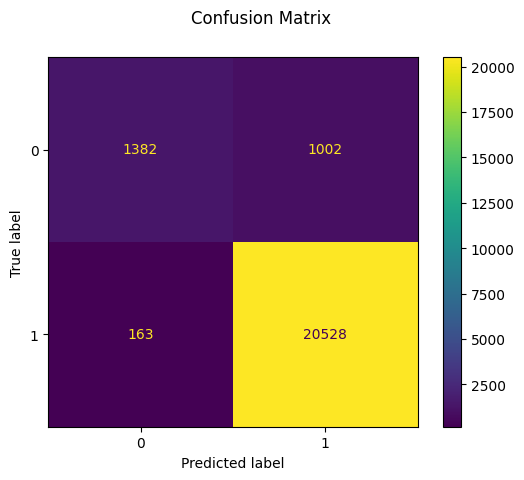

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...):
              precision    recall  f1-score   support

           0       0.89      0.58      0.70      2384
           1       0.95      0.99      0.97     20691

    accuracy                           0.95     23075

In [ ]:
y_new= result_df['official_type']
X_new=result_df[nominal_features]
predicted = dt_split.predict(X_new)

# 1 = RES; 0 = NON_RES

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_new, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

print(
    f"Classification report for classifier {dt_split}:\n"
    f"{metrics.classification_report(y_new, predicted)}\n"
)

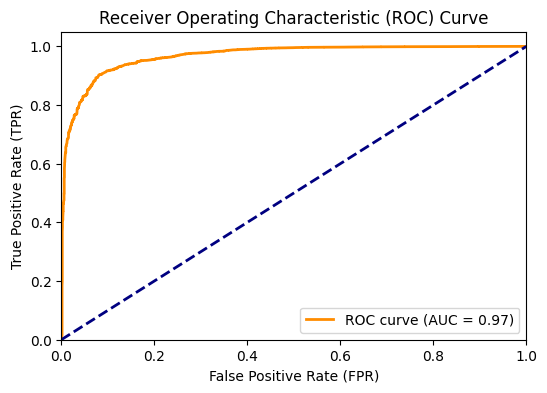

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming you have computed 'y_new' (true labels) and 'predicted' (binary predictions) for your classifier
y_scores = dt_split.predict_proba(X_new)[:, 1]  # Get the predicted probabilities for the positive class

# Compute the ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_new, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()